In [1]:
import pandas as pd
import numpy as np

In [2]:
# C:\Users\Ramshankar\OneDrive - iLink Systems Inc\Documents\Costco\Dataset\Final Output\Weekly
    
    
    
data = pd.read_excel("C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\Data_Weekly.xlsx")

In [3]:
data

,Location,Item,Date,Quantity,Amount
0,FREMONT,CHICKEN XXXXX - O,2020-01-05,37.023380,184.746667
1,FREMONT,CHICKEN XXXXX - O,2020-01-12,41.889780,209.030000
2,FREMONT,CHICKEN XXXXX - O,2020-01-19,86.101210,429.645000
3,FREMONT,CHICKEN XXXXX - O,2020-01-26,63.834068,318.532000
4,FREMONT,CHICKEN XXXXX - O,2020-02-02,45.320977,226.151667
...,...,...,...,...,...
2122,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-10-30,113.512925,146.431667
2123,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-06,97.404393,125.651667
2124,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-13,93.240305,120.280000
2125,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,2022-11-20,94.381132,121.751667


In [4]:
import copy

data2= copy.deepcopy(data)

In [5]:
data3= data2[(data2['Location']=='FREMONT') & (data2['Item']=='CHICKEN XXXXX - O')]

In [6]:
data3= data3.drop(['Location', 'Item', 'Amount'], axis=1)

In [7]:
data3.head()

,Date,Quantity
0,2020-01-05,37.023380
1,2020-01-12,41.889780
2,2020-01-19,86.101210
3,2020-01-26,63.834068
4,2020-02-02,45.320977


In [8]:
data3.isnull().sum()

Date        0
Quantity    0
dtype: int64

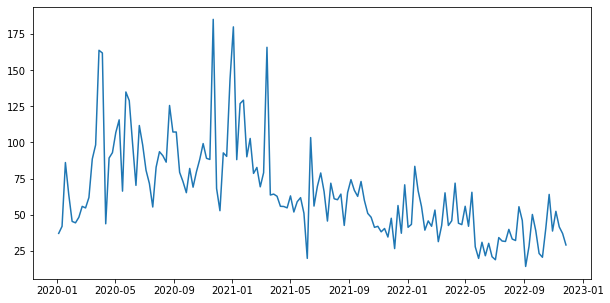

In [9]:
#Plotting data

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data3['Date'],data3['Quantity'])

In [58]:
#CHecking trend, seanality and Residual

import statsmodels.api as sm

# df = data3
# df.set_index(['Date'],inplace=True)

# res = sm.tsa.seasonal_decompose(df)


# fig, ax = plt.subplots(4,1,figsize=(15, 15))
# ax[0].plot(res.observed)
# ax[0].set_title('QTY')
# ax[1].plot(res.trend)
# ax[1].set_title('Trend')
# ax[2].plot(res.seasonal)
# ax[2].set_title('Seanality')
# ax[3].plot(res.resid)
# ax[3].set_title('residual')
# plt.show()

In [10]:
#Checking Stationary 

from statsmodels.tsa.stattools import adfuller
df = data3.copy()
df.set_index(['Date'],inplace=True)
dftest = adfuller(df['Quantity'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)
     

1. ADF :  -2.0447229947321865
2. P-Value :  0.26731421475931283
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 147
5. Critical Values :
	 1% :  -3.4756368462466662
	 5% :  -2.8814104466172608
	 10% :  -2.5773652982553568


In [11]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Quantity'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])

1. ADF :  -2.0447229947321865
2. P-Value :  0.26731421475931283


 Data is non-stationary. 
 ADF is less than critical value and p-value is greater than 0.05 so we accept the null-hypothesis. 

In [26]:
# p-value > 0.05% - Data is  non-stationer.
# p-value <=0.05% - Data is  stationer.
# https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

'''
1.The p-value
2.The value of the test statistic
3.Number of lags considered for the test
4.The critical value cutoffs.

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

'''


'\n1.The p-value\n2.The value of the test statistic\n3.Number of lags considered for the test\n4.The critical value cutoffs.\n\nWhen the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.\n\n'

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [15]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Quantity'])

print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.219351
p-value: 0.010000


C:\Users\Ramshankar\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Quantity'])

print('KPSS Statistic: %f' % kpss_test[0])
# print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

 Null- series is stationary. 
    Data is non-stationary. 
 p-value is less than 0.05 so we rejec the null-hypothesis. 

### Moving Average

In [28]:

data_SMA = data3.copy()  #Single Moving Average (SMA)
data_DMA = data3.copy()   #Double Moving Average (DMA) 
     

In [34]:
data_DMA['Mv_Qty'] = data_DMA['Quantity'].rolling(window =3).mean()
data_DMA['Mv_Qty2'] = data_DMA['Mv_Qty'].rolling(window =3).mean()

<AxesSubplot:xlabel='Date'>

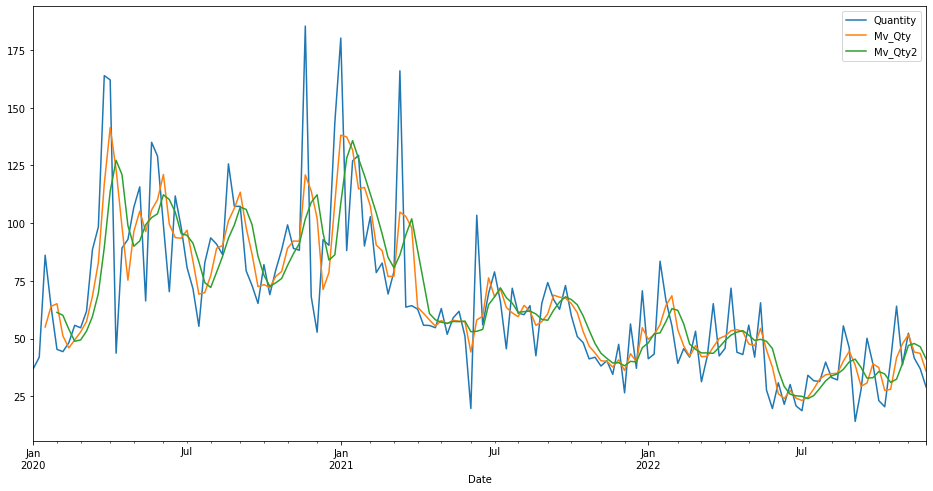

In [35]:
# plt.title('Single Moving Average')
data_DMA[['Quantity', 'Mv_Qty', 'Mv_Qty2']].plot(label='Quantity',figsize=(16, 8))

In [36]:
data_DMA

,Quantity,Mv_Qty,Mv_Qty2
Date,,,
2020-01-05,37.023380,NaN,NaN
2020-01-12,41.889780,NaN,NaN
2020-01-19,86.101210,55.004790,NaN
2020-01-26,63.834068,63.941686,NaN
2020-02-02,45.320977,65.085418,61.343965
...,...,...,...
2022-10-30,38.625329,47.729914,39.150237
2022-11-06,52.301170,51.649819,47.019642
2022-11-13,41.523016,44.149838,47.843190


In [39]:
df_DMA = data_DMA.reset_index()

In [40]:
df_DMA

,Date,Quantity,Mv_Qty,Mv_Qty2
0,2020-01-05,37.023380,NaN,NaN
1,2020-01-12,41.889780,NaN,NaN
2,2020-01-19,86.101210,55.004790,NaN
3,2020-01-26,63.834068,63.941686,NaN
4,2020-02-02,45.320977,65.085418,61.343965
...,...,...,...,...
147,2022-10-30,38.625329,47.729914,39.150237
148,2022-11-06,52.301170,51.649819,47.019642
149,2022-11-13,41.523016,44.149838,47.843190
150,2022-11-20,36.942523,43.588903,46.462853


In [42]:
df_DMA['Date'].values

array(['2020-01-05T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-02-02T00:00:00.000000000', '2020-02-09T00:00:00.000000000',
       '2020-02-16T00:00:00.000000000', '2020-02-23T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2020-03-15T00:00:00.000000000', '2020-03-22T00:00:00.000000000',
       '2020-03-29T00:00:00.000000000', '2020-04-05T00:00:00.000000000',
       '2020-04-12T00:00:00.000000000', '2020-04-19T00:00:00.000000000',
       '2020-04-26T00:00:00.000000000', '2020-05-03T00:00:00.000000000',
       '2020-05-10T00:00:00.000000000', '2020-05-17T00:00:00.000000000',
       '2020-05-24T00:00:00.000000000', '2020-05-31T00:00:00.000000000',
       '2020-06-07T00:00:00.000000000', '2020-06-14T00:00:00.000000000',
       '2020-06-21T00:00:00.000000000', '2020-06-28T00:00:00.000000000',
       '2020-07-05T00:00:00.000000000', '2020-07-12

In [43]:
train = df_DMA[df_DMA['Date']<= '2022-05-01']
test = df_DMA[df_DMA['Date']>= '2022-05-01']

In [44]:
train.shape, test.shape

((122, 4), (31, 4))

In [46]:
train= train.drop(['Quantity','Mv_Qty'], axis=1)

In [47]:
train

,Date,Mv_Qty2
0,2020-01-05,NaN
1,2020-01-12,NaN
2,2020-01-19,NaN
3,2020-01-26,NaN
4,2020-02-02,61.343965
...,...,...
117,2022-04-03,49.156978
118,2022-04-10,51.507978
119,2022-04-17,52.793165
120,2022-04-24,53.416229


In [48]:
train= train.rename(columns= {'Date': 'ds', 'Mv_Qty2': 'y'})

In [49]:
from prophet import Prophet

In [50]:
model = Prophet()
model.fit(train)

17:22:55 - cmdstanpy - INFO - Chain [1] start processing
17:22:55 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
test1= test.drop(['Quantity','Mv_Qty', 'Mv_Qty2'], axis=1)
test1= test1.rename(columns= {'Date': 'ds'})
test1.head()

,ds
121,2022-05-01
122,2022-05-08
123,2022-05-15
124,2022-05-22
125,2022-05-29


In [52]:
forecasted = model.predict(test1)

In [53]:
forecasted_df= forecasted[['ds', 'yhat']]

In [54]:
forecasted_df

,ds,yhat
0,2022-05-01,37.351423
1,2022-05-08,32.672541
2,2022-05-15,32.006206
3,2022-05-22,34.473715
4,2022-05-29,37.293085
5,2022-06-05,37.931457
6,2022-06-12,36.347652
7,2022-06-19,34.818294
8,2022-06-26,35.167103
9,2022-07-03,36.362837


In [55]:
data4= df_DMA.rename(columns= {'Date':'ds', 'Mv_Qty2': 'y'})
data_merge= pd.merge(data4,forecasted_df, on= ['ds'], how ='inner' )


<AxesSubplot:>

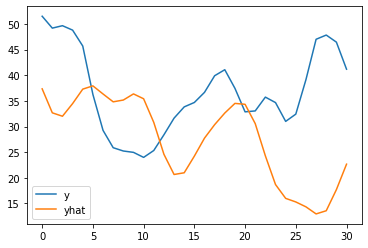

In [57]:
data_merge[['y', 'yhat']].plot()

### Double exponential smoothing

In [64]:
data3

,Date,Quantity
0,2020-01-05,37.023380
1,2020-01-12,41.889780
2,2020-01-19,86.101210
3,2020-01-26,63.834068
4,2020-02-02,45.320977
...,...,...
147,2022-10-30,38.625329
148,2022-11-06,52.301170
149,2022-11-13,41.523016
150,2022-11-20,36.942523


In [65]:
train = data3[data3['Date']<= '2022-05-01']
test = data3[data3['Date']>= '2022-05-01']

In [69]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

__Holt__

In [70]:
y_hat_avg = test.copy()
model_fit = Holt(np.asarray(train['Quantity'])).fit()
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [73]:
# plt.figure(figsize=(16,8))
# plt.plot(train['Quantity'], label='Train')
# plt.plot(test['Quantity'], label='Test')
# plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
# plt.legend(loc='best')
# plt.show()

__ExponentialSmoothing__

In [74]:
# create class
model = SimpleExpSmoothing(train['Quantity'])
model_fit = model.fit(optimized = True)
print('')

In [75]:
y_hat_avg['SES']= model_fit.forecast(len(test['Quantity']))

alpha_value = np.round(model_fit.params['smoothing_level'], 4)

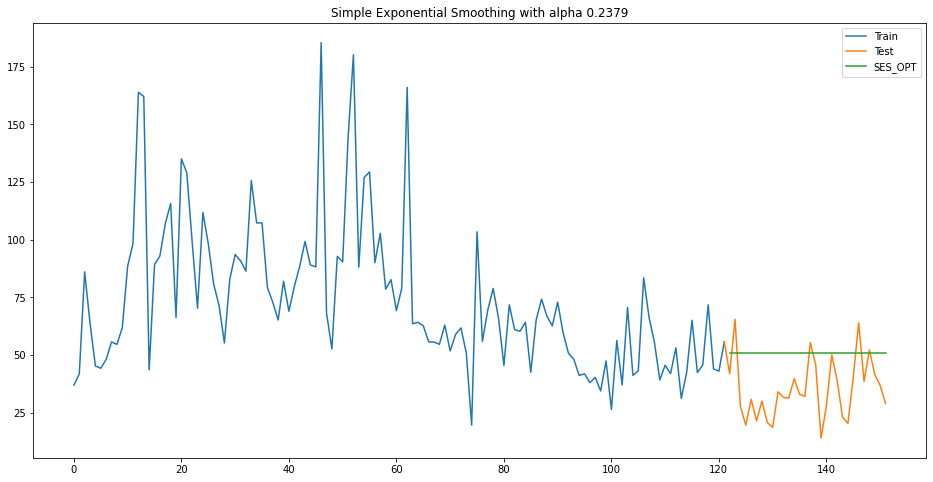

In [76]:
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Quantity'], label = 'Train')
plt.plot(test.index, test['Quantity'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

### Inventry data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("C:\\Users\\Ramshankar\\Downloads\Inventory 2022 V2.xlsx")

In [3]:
data

,Date,Item,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,On-Hand Qty,On-Hand Amount,On-Order Qty,On-Order Amt,In-Transit Qty,In-Transit Amt
0,2022-06-29,FRESH CHICKEN XXXXX - O,US,AK,NORTHWEST,NW3,ANCHORAGE,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,60,479.40,630,5033.70,540,4314.6
1,2022-11-17,DRUMSTICKS NNNN,US,AZ,SD REGION,SD2,AVONDALE,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,-2,-19.98,0,0.00,0,0.0
2,2022-04-26,DRUMSTICKS NNNN,US,AK,NORTHWEST,NW3,ANCHORAGE,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,565,4514.35,315,2516.85,1260,10067.4
3,2022-08-17,FRESH CHICKEN XXXXX - O,US,AK,NORTHWEST,NW3,ANCHORAGE,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,1129,7891.71,0,0.00,180,1258.2
4,2022-11-17,BEEF OOOO - GT,US,AR,TEXAS REGION,TE2,LITTLE ROCK,FRESH FOOD,61 MEAT,6 MEAT,62 GROUND BEEF PROGRAM,620 GROUND BEEF,127,760.73,0,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99580,2022-12-25,CHICKEN XXXXX - O,US,WA,NORTHWEST,NW4,LACEY,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,205,1637.95,135,1078.65,0,0.0
99581,2022-04-30,BEEF OOOO - GT,US,WA,NORTHWEST,NW4,SEQUIM,FRESH FOOD,61 MEAT,6 MEAT,62 GROUND BEEF PROGRAM,620 GROUND BEEF,248,1981.52,135,1078.65,0,0.0
99582,2022-07-30,FRESH CHICKEN XXXXX - O,US,WA,NORTHWEST,NW4,SILVERDALE,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,363,2900.37,270,2157.30,0,0.0
99583,2022-01-31,FILLET QQQQ,US,WA,NORTHWEST,NW4,TACOMA,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,311,2484.89,270,2157.30,0,0.0


In [4]:
loct= ['FREMONT', 'HAYWARD', 'LAKEWOOD', 'RICHMOND CA', 'S SAN FRANCISCO BUS CTR']

Data_ft= data[data['Location'].isin(loct)]


In [5]:
Data_ft

,Date,Item,Country,State,Region,District,Location,Major Department,Department,Category,Group,Item Category,On-Hand Qty,On-Hand Amount,On-Order Qty,On-Order Amt,In-Transit Qty,In-Transit Amt
1363,2022-05-08,FRESH CHICKEN XXXXX - O,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,546,3816.54,0,0.00,0,0.0
1663,2022-08-11,CHICKEN XXXXX - O,US,CA,BAY AREA,BA3,FREMONT,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,848,5927.52,0,0.00,0,0.0
1723,2022-11-11,CHICKEN XXXXX - O,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,247,1726.53,0,0.00,180,1258.2
1889,2022-03-03,FILLET QQQQ,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,68 SEAFOOD,680 FRESH FISH FILLETS,300,2097.00,0,0.00,0,0.0
1912,2022-01-06,FRESH CHICKEN XXXXX - O,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,213,1488.87,180,1258.20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99046,2022-01-27,CHICKEN XXXXX - O,US,CA,BAY AREA,BA3,FREMONT,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,866,6919.34,270,2157.30,180,1438.2
99055,2022-11-22,CHICKEN XXXXX - O,US,CA,BAY AREA,BA3,HAYWARD,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,566,4522.34,405,3235.95,0,0.0
99315,2022-06-06,DRUMSTICKS NNNN,US,CA,BAY AREA,BA2,RICHMOND CA,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,640 CONVENTIONAL CHICKEN,300,2397.00,0,0.00,0,0.0
99348,2022-12-12,FRESH CHICKEN XXXXX - O,US,CA,BAY AREA,BA3,FREMONT,FRESH FOOD,61 MEAT,6 MEAT,64 POULTRY,645 CHICKEN XXXXX - O,3,23.97,0,0.00,0,0.0


In [8]:
for i in Data_ft['Location'].unique():
    df= Data_ft[Data_ft['Location']==i]
#     for j in df['Item'].unique():
    print(i, ":-", list(df['Item'].unique()))

RICHMOND CA :- ['FRESH CHICKEN XXXXX - O', 'FILLET QQQQ', 'CHICKEN XXXXX - O', 'BEEF OOOO - GT', 'DRUMSTICKS NNNN']
FREMONT :- ['CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ', 'FRESH CHICKEN XXXXX - O', 'BEEF OOOO - GT']
HAYWARD :- ['CHICKEN XXXXX - O', 'BEEF OOOO - GT', 'FRESH CHICKEN XXXXX - O', 'FILLET QQQQ', 'DRUMSTICKS NNNN']
S SAN FRANCISCO BUS CTR :- ['FILLET QQQQ', 'BEEF OOOO - GT', 'CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FRESH CHICKEN XXXXX - O']
LAKEWOOD :- ['CHICKEN XXXXX - O', 'FRESH CHICKEN XXXXX - O', 'DRUMSTICKS NNNN', 'FILLET QQQQ', 'BEEF OOOO - GT']


In [ ]:
#Filtering product items only 

product_item = ['FOOD', 'FRESH FOOD', 'SOFTLINES', 'HARDLINES']

filter_product = filter1[filter1['MAJOR_DEPT_GRP_LONG_DESC'].isin(product_item)]